https://factsbeyondnumbers.wordpress.com/2020/06/18/extracting-daily-stock-price-data-in-python/

download the scanner csv from chartink( only premium chartink gives all historical data, free users can get only 9 months  limited data)
download all historical data using this python script to know next day or previous day price action
check the outcome using this script and get the result of backtest

In [9]:
# Import modules
from nsepy import get_history
from datetime import datetime, timedelta
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #For solving import pandas_datareader issue
import numpy as np
import datetime
import csv
import requests
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
path = r"A:\FinMinII\Trading\NSE_Indices\Backtest\Nifty_Backtest"
file = "Backtest RSI and Nifty.csv"#


# # # Input Start and End Date
start = datetime.datetime(2011,1,7) # keep the strt date starting from Friday for weekly analysis (Friday is first day for expirty week and month)
end = pd.to_datetime('today').normalize() #datetime.datetime(2022,2,2)

print(start)
print(end)

2011-01-07 00:00:00
2022-03-08 00:00:00


In [11]:
import os
os.getcwd()
os.chdir(path)
os.getcwd()

'A:\\FinMinII\\Trading\\NSE_Indices\\Backtest\\Nifty_Backtest'

In [12]:
NIFTY_opt = get_history(symbol="NIFTY",
                        start=start,
                        end=end,
                        index=True)

In [13]:
NIFTY_opt.tail(15)

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2022-02-15,16933.25,17375.00,16839.25,17352.45,298658142.0,2.476567e+11
2022-02-16,17408.45,17490.60,17257.70,17322.20,244549223.0,2.112838e+11
2022-02-17,17396.55,17442.90,17235.85,17304.60,232136131.0,1.938126e+11
2022-02-18,17236.05,17380.80,17219.20,17276.30,189620888.0,1.612696e+11
2022-02-21,17192.25,17351.05,17070.70,17206.65,215183301.0,1.872557e+11
2022-02-22,16847.95,17148.55,16843.80,17092.20,300131995.0,2.404084e+11
2022-02-23,17194.50,17220.70,17027.85,17063.25,200229631.0,1.766247e+11
2022-02-24,16548.90,16705.25,16203.25,16247.95,457967874.0,3.665083e+11
2022-02-25,16515.65,16748.80,16478.30,16658.40,329780732.0,2.574377e+11


array([[<AxesSubplot:title={'center':'Close'}>]], dtype=object)

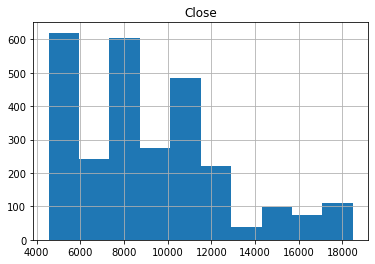

In [14]:
NIFTY_opt.hist(column = 'Close')

In [15]:
dfdata = NIFTY_opt
dfdata.reset_index(level=0, inplace=True)

# dfdata = dfdata [['Date','Close']]


In [16]:
dfdata = dfdata [['Date','Open','Close']] 
# dfdata ['Date'] = pd.<a onclick="parent.postMessage({'referent':'.pandas.to_datetime'}, '*')">to_datetime(dfdata['Date'].apply(lambda x: x.split()[0])) 
dfdata .set_index('Date',drop=True,inplace=True) 


In [17]:
dfdata .tail()

,Open,Close
Date,,
2022-03-02,16593.10,16605.95
2022-03-03,16723.20,16498.05
2022-03-04,16339.45,16245.35
2022-03-07,15867.95,15863.15
2022-03-08,15747.75,16013.45


In [18]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [19]:
#creating dataframe
data = NIFTY_opt.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(NIFTY_opt)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2767 non-null   object
 1   Close   2767 non-null   object
dtypes: object(2)
memory usage: 43.4+ KB


In [22]:
new_data.tail(5)

,Date,Close
2762,2022-03-02,16605.95
2763,2022-03-03,16498.05
2764,2022-03-04,16245.35
2765,2022-03-07,15863.15
2766,2022-03-08,16013.45


In [23]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [24]:
new_data.tail(5)

,Close
Date,
2022-03-02,16605.95
2022-03-03,16498.05
2022-03-04,16245.35
2022-03-07,15863.15
2022-03-08,16013.45


In [25]:
#creating train and test sets
dataset = new_data.values

train, valid= np.split(new_data, [int(.7 *len(new_data))])
# train = dataset[0:987,:]
# valid = dataset[987:,:]

array([[5904.6],
       [5762.85],
       [5754.1],
       ...,
       [16245.35],
       [15863.15],
       [16013.45]], dtype=object)

In [16]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 5s - loss: 0.0166


In [17]:
# Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

Close    420.856471
dtype: float64

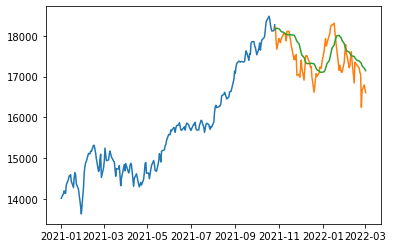

In [18]:
#for plotting
# train = new_data[:987]
# valid = new_data[987:]

train, valid= np.split(new_data, [int(.7 *len(new_data))])
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])